Варіант 5
Контекст:
Ваш набір даних містить показники інфляції, споживчі ціни (річних %), які збирає Світовий Банк (The World Bank).
Поля включають:
•	Country – Країна
•	Country Code - код країни
•	Year – рік
•	Inflation - інфляція
Завдання:
1.	Завантажте дані у проект
2.	Зробіть перевірку даних на консистентність та обробіть пропуски, якщо вони є (дроп або заміна даних)
3.	Зробіть розвідувальний аналіз даних:
a.	Знайдіть топ-10 країн з найбільшою сумарною інфляцією за період з 2000 по 2010 роки
b.	Обрахуйте кореляційну матрицю між показниками інфляції країн із даних за період з 2010 по 2016
c.	Намалюйте heatmap розрахованої кореляційної матриці


In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
CLEAN = ["Caribbean small states", "World", "Yemen, Rep.", "West Bank and Gaza", "Upper middle income", "Sub-Saharan Africa (excluding high income)", "South Asia (IDA & IBRD)", "South Asia", "South Africa", "Small states", "Pre-demographic dividend", "Post-demographic dividend", "Pacific island small states", "Other small states","OECD members", "North America","Middle income", "Middle East & North Africa (excluding high income)", "Micronesia, Fed. Sts.", "Lower middle income","Low income","Low & middle income", "Least developed countries: UN classification", "Latin America & the Caribbean (IDA & IBRD countries)", "Late-demographic dividend", "IDA total", "IDA blend", "IDA & IBRD total", "IBRD only", "Hong Kong SAR, China", "High income", "Heavily indebted poor countries (HIPC)", "Fragile and conflict affected situations", "European Union", "Europe & Central Asia (excluding high income)", "East Asia & Pacific (excluding high income)", "Early-demographic dividend", "Central African Republic", "Caribbean small states", "Arab World", "Central Europe and the Baltics", "East Asia & Pacific", "East Asia & Pacific (IDA & IBRD countries)", "Euro area", "Europe & Central Asia", "Europe & Central Asia (IDA & IBRD countries)", "IDA only", "Latin America & Caribbean", "Latin America & Caribbean (excluding high income)", "Middle East & North Africa", "Middle East & North Africa (IDA & IBRD countries)", "Sub-Saharan Africa", "Sub-Saharan Africa (IDA & IBRD countries)"]

In [4]:
df = pd.read_csv('inflation-consumer_csv.csv')
df.columns = [column.lower().replace("-", "_").replace(" ", "_") for column in df.columns]

In [6]:
df_clean=df[~df['country'].isin(CLEAN)]

In [7]:
display(df_clean)

,country,country_code,year,inflation
2185,Afghanistan,AFG,2003,11.715672
2186,Afghanistan,AFG,2004,11.242729
2187,Afghanistan,AFG,2005,10.900268
2188,Afghanistan,AFG,2006,7.171261
2189,Afghanistan,AFG,2007,22.382016
...,...,...,...,...
11009,Zimbabwe,ZWE,2012,2.563181
11010,Zimbabwe,ZWE,2013,2.805703
11011,Zimbabwe,ZWE,2014,0.700921
11012,Zimbabwe,ZWE,2015,0.898072


In [8]:
df_task_a = df_clean[(df_clean.year >= 2000) & (df_clean.year <= 2010)]

In [9]:
sum_task_a = df_task_a[["country","inflation"]].groupby("country", as_index=False).sum().sort_values(["inflation"],ascending=False).head(10).reset_index(drop=True)

In [10]:
sum_task_a

,country,inflation
0,"Congo, Dem. Rep.",2886.374323
1,Angola,932.942292
2,Belarus,447.630232
3,Uzbekistan,307.327666
4,Ghana,293.937192
5,"Venezuela, RB",286.224326
6,Serbia,266.746613
7,Suriname,264.045309
8,Malawi,260.842674
9,Nigeria,240.257216


[Text(0, 0, 'Congo, Dem. Rep.'),
 Text(1, 0, 'Angola'),
 Text(2, 0, 'Belarus'),
 Text(3, 0, 'Uzbekistan'),
 Text(4, 0, 'Ghana'),
 Text(5, 0, 'Venezuela, RB'),
 Text(6, 0, 'Serbia'),
 Text(7, 0, 'Suriname'),
 Text(8, 0, 'Malawi'),
 Text(9, 0, 'Nigeria')]

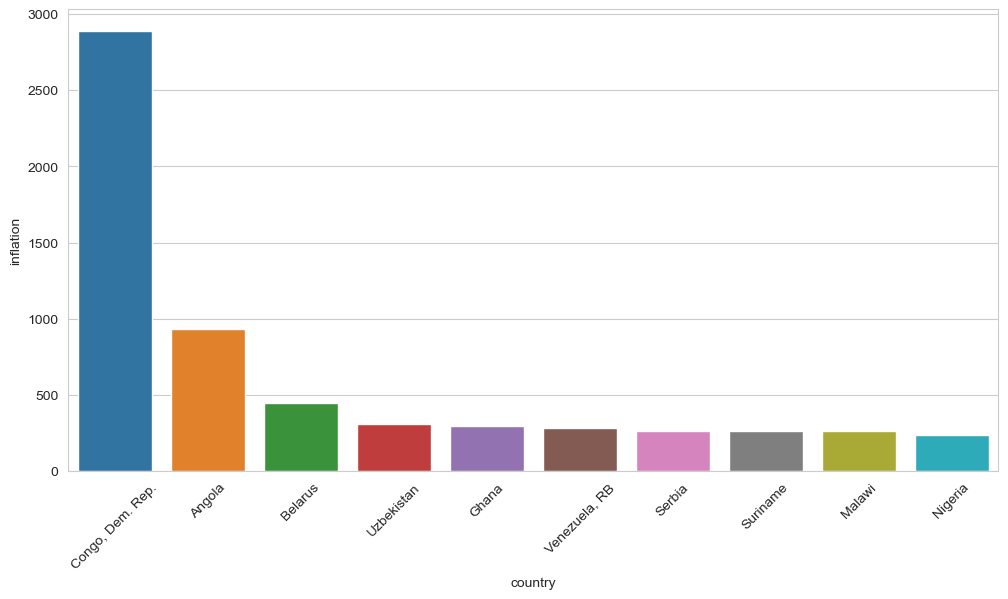

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=sum_task_a, x="country", y="inflation")

In [12]:
df_task_b = df_clean[(df_clean.year >= 2010) & (df_clean.year <= 2016)]

In [13]:
dict_task_2 = df_task_b.groupby(["country", "year"]).sum().sort_values("inflation", ascending=False)
display(dict_task_2)
dict_transform = dict_task_2.loc[dict_task_2.index.get_level_values(0).unique()[:10].tolist()]

df_task_2 = pd.pivot_table(dict_transform,columns='country',values='inflation',index='year').fillna(0)
display(df_task_2)

inflation
country           year            
Nigeria           2010  103.822799
Belarus           2012   75.201117
                  2011   70.771426
South Sudan       2011   54.143072
Venezuela, RB     2010   45.943269
...                            ...
Qatar             2015  -22.901812
Equatorial Guinea 2015  -23.791236
Kuwait            2015  -25.959144
Iraq              2015  -26.865709
Congo, Rep.       2015  -29.691067

[1335 rows x 1 columns]

country,Argentina,Belarus,Ethiopia,"Iran, Islamic Rep.",Mongolia,Nigeria,South Sudan,Sudan,Ukraine,"Venezuela, RB"
year,,,,,,,,,,
2010,20.915124,15.059847,1.444572,15.882626,39.178188,103.822799,21.627969,19.580753,13.411766,45.943269
2011,23.703472,70.771426,20.061875,23.742975,15.119265,9.510096,54.143072,21.001580,14.200791,28.149191
2012,22.314881,75.201117,33.541405,24.016109,12.784379,9.271245,6.468583,34.876204,7.794923,14.059430
2013,23.948798,21.232672,4.901979,35.567451,2.907848,5.873296,13.021290,34.903400,4.337018,35.502675
2014,40.282972,18.108987,10.981788,10.838113,7.448837,4.662623,-3.085157,33.895174,15.901809,40.440490
2015,24.545357,16.022492,10.836543,0.429237,1.733009,2.863665,0.468126,17.903758,38.881659,0.000000
2016,40.675310,7.761322,9.450112,1.607189,2.123295,9.543670,0.000000,-2.745336,17.142395,0.000000


In [14]:
correlation_task_c = df_task_2.corr()
display(correlation_task_c)

country,Argentina,Belarus,Ethiopia,"Iran, Islamic Rep.",Mongolia,Nigeria,South Sudan,Sudan,Ukraine,"Venezuela, RB"
country,,,,,,,,,,
Argentina,1.000000,-0.461031,-0.171551,-0.530569,-0.468001,-0.366873,-0.506156,-0.369194,0.095028,-0.187482
Belarus,-0.461031,1.000000,0.873031,0.509169,0.115052,-0.224207,0.561564,0.398807,-0.343278,-0.008475
Ethiopia,-0.171551,0.873031,1.000000,0.190813,-0.158892,-0.441165,0.125974,0.289695,-0.154222,-0.342253
"Iran, Islamic Rep.",-0.530569,0.509169,0.190813,1.000000,0.171756,0.015228,0.476318,0.677806,-0.797944,0.556562
Mongolia,-0.468001,0.115052,-0.158892,0.171756,1.000000,0.930493,0.433296,0.054028,-0.251922,0.600481
Nigeria,-0.366873,-0.224207,-0.441165,0.015228,0.930493,1.000000,0.217628,-0.123938,-0.142279,0.516443
South Sudan,-0.506156,0.561564,0.125974,0.476318,0.433296,0.217628,1.000000,0.021291,-0.257978,0.341341
Sudan,-0.369194,0.398807,0.289695,0.677806,0.054028,-0.123938,0.021291,1.000000,-0.410680,0.553912
Ukraine,0.095028,-0.343278,-0.154222,-0.797944,-0.251922,-0.142279,-0.257978,-0.410680,1.000000,-0.551872


<AxesSubplot:xlabel='country', ylabel='country'>

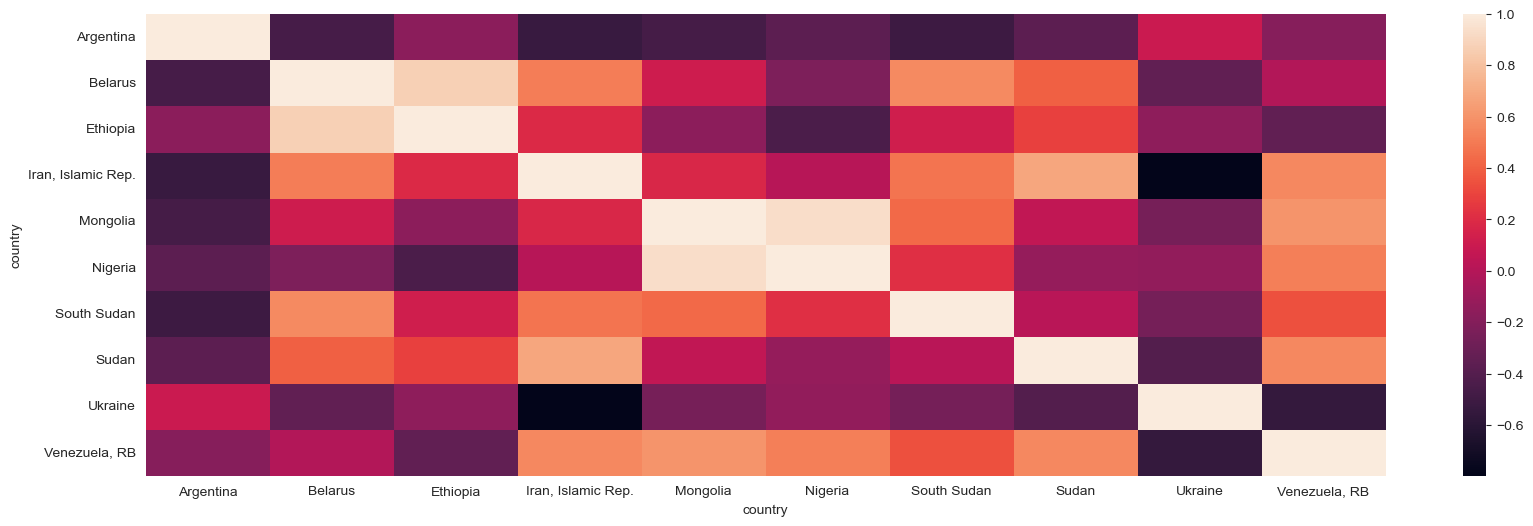

In [15]:
plt.figure(figsize=(20,6))
plt.rcParams["figure.autolayout"] = True
sns.heatmap(correlation_task_c.head(11))